In [3]:
import os
import json

Generating pre-evacuation dataset for following cities in Texas from 08/23/2017 to 25/08/2017 using keyword 'harvey' 

In [6]:
cities_mandated = ["Ganado", "La Ward", "Edna", "Anniston", "Glencoe", "Jacksonville", "Oxford", "Piedmont", "Southside", \
              "Weaver", "Austwell", "Alvin", "Angleton", "Brazoria", "Brookside Village", "Clute", "Danbury", \
              "Freeport", "Lake Jackson", "Liverpool", "Manvel", "Oyster Creek", "Pearland", "Richwood", "Sandy Point", \
              "Surfside Beach", "Sweeny", "West Columbia", "Aransas Pass ", "Corpus Christi ", "Ingleside", "Portland", \
              "San Patricio", "Gregory", "Ingleside on the Bay", "Mathis", "Odem", "Sinton", "Taft", "Victoria"]

for subdir, dirs, files in os.walk(".//Harvey_Pre_USA"):
    for file in files:
        tweets = []
        filepath = subdir + os.sep + file
        for tweet in json.load(open(filepath, 'r')):
            try:
                for city in cities_mandated:
                    if city in tweet["place"]["full_name"].encode('utf-8') and \
                    "TX" in tweet["place"]["full_name"].encode('utf-8'):
                        tweets.append(tweet)
            except:
                continue
        f = open(".//Harvey_Pre_Evacuation_Mandated//" +file, 'w+')
        json.dump(tweets, f)

Generating unique users from pre-evacuation dataset.

In [2]:
users_set_pre_evacuation = set()
for subdir, dirs, files in os.walk(".//Harvey_Pre_Evacuation_Mandated"):
    for file in files:
        filepath = subdir + os.sep + file
        try:
            for tweet in json.load(open(filepath, 'r')):
                users_set_pre_evacuation.add(tweet["user"]["id"])
        except:
            continue 
print "Number of unique users from pre-evacuation dataset:", len(users_set_pre_evacuation)

Number of unique users from pre-evacuation dataset:  212


Generating unique users from post-evacuation dataset.

In [4]:
users_set_post_evacuation = set()
for subdir, dirs, files in os.walk(".//Harvey_Post_USA"):
    for file in files:
        filepath = subdir + os.sep + file
        try:
            for tweet in json.load(open(filepath, 'r')):
                users_set_post_evacuation.add(tweet["user"]["id"])
        except:
            continue 
print "Number of unique users from post-evacuation dataset:", len(users_set_post_evacuation)

Number of unique users from post-evacuation dataset: 123512


Generating intersection of common users from pre-evacuation and post-evacuation dataset.

In [6]:
common_users = []
common_users = users_set_pre_evacuation.intersection(users_set_post_evacuation)
number_common_users = len(common_users)
print "Number of common users from pre-evacuation and post-evacuation dataset: ",number_common_users

Number of common users from pre-evacuation and post-evacuation dataset:  143


**Generating tweets of common users from pre-evacuation period.**

In [8]:
common_user_pre_tweets = {}

for userid in common_users:
    common_user_pre_tweets[userid] = []
    
for subdir, dirs, files in os.walk(".//Harvey_Pre_Evacuation_Mandated"):
    for file in files:
        filepath = subdir + os.sep + file
        for tweet in json.load(open(filepath, 'r')):
           
            if (tweet["user"]["id"] in common_users):
                common_user_pre_tweets[tweet["user"]["id"]].append(tweet)
        
f = open(".//common_user_pre_tweets.json", 'w+')
json.dump(common_user_pre_tweets, f) 
   

**Generating tweets of common users from post-evacuation period.**

In [ ]:
common_user_post_tweets = {}

for userid in common_users:
    common_user_post_tweets[userid] = []
    
for subdir, dirs, files in os.walk(".//Harvey_Post_USA"):
    for file in files:
        filepath = subdir + os.sep + file
        for tweet in json.load(open(filepath, 'r')):    
            if (tweet["user"]["id"] in common_users):
                common_user_post_tweets[tweet["user"]["id"]].append(tweet)

f = open(".//common_user_post_tweets.json", 'w+')
json.dump(common_user_post_tweets, f) 

Generating evacuated users.

In [15]:
common_users_pre_json = json.load(open("common_user_pre_tweets.json", 'r'))
common_users_post_json = json.load(open("common_user_post_tweets.json", 'r'))
evacuated = {}
common_users =  set(open('.//common_users.txt').read().split())

for user in common_users:
    pre_loc=set()
    post_loc=set()
    for tweet in common_users_pre_json[str(user)]:
        pre_loc.add(tweet["place"]["full_name"])
    for tweet in common_users_post_json[str(user)]:
        post_loc.add(tweet["place"]["full_name"])
    if "Texas, USA" in post_loc:
        post_loc.remove("Texas, USA")
    if (not pre_loc == post_loc and not len(post_loc)==0):
        evacuated[str(user)] = [pre_loc, post_loc]
        
number_evacuated = len(evacuated)
print "Number of users that may have evacuated: ", number_evacuated
print evacuated['371782628']
print evacuated['1569326526']

Number of users that may have evacuated:  68
[set([u'Mathis, TX']), set([u'Los Angeles, CA', u'Corpus Christi, TX'])]
[set([u'Victoria, TX']), set([u'Manhattan, NY'])]


Computing evacuation rate.

In [27]:
print "Estimated evacuation rate: ", number_evacuated, "/", number_common_users, "= %0.2f" \
% (number_evacuated/(number_common_users * 1.0) * 100) + "%"

Estimated evacuation rate:  68 / 143 = 47.55%


Generating evacuation rates by conglomerates.

Finding number of common users by conglomerates. 

In [4]:
counties_total = {"Jackson County": 0,  "Calhoun": 0, "Refugio": 0, "San Patricio": 0, "Victoria County": 0, "Brazoria": 0}

cities_dict = {"Jackson County": ["Ganado", "La Ward", "Edna"],\
               "Calhoun": ["Anniston", "Glencoe", "Jacksonville", "Oxford", "Piedmont", "Southside Place","Weaver"],\
               "Refugio": ["Austwell"],\
               "Brazoria": ["Alvin", "Angleton", "Brazoria", "Brookside Village", "Clute", "Danbury", "Freeport",\
                                "Lake Jackson", "Liverpool", "Manvel", "Oyster Creek", "Pearland", "Richwood",\
                                "Sandy Point", "Surfside Beach", "Sweeny", "West Columbia"],\
               "San Patricio": ["Aransas Pass ", "Corpus Christi ", "Ingleside", "Portland", "San Patricio",\
                                    "Gregory", "Ingleside on the Bay", "Mathis", "Odem", "Sinton", "Taft"],\
               "Victoria County": ["Victoria"]}

common_users =  set(open('.//common_users.txt').read().split())

common_users_pre_json = json.load(open("common_user_pre_tweets.json", 'r'))

for user in common_users:
    for county, cities in cities_dict.iteritems():
        if common_users_pre_json[str(user)][0]["place"]["full_name"].split(',', 1)[0] in cities:
            counties_total[county]+=1
    
print counties_total
print len(common_users)    

{'Victoria County': 20, 'Brazoria': 99, 'Jackson County': 1, 'Calhoun': 2, 'Refugio': 0, 'San Patricio': 21}
143


Finding number of evacuated users by conglomerates. 

In [29]:
counties_evacuated = {"Jackson County": 0,  "Calhoun": 0, "Refugio": 0, "San Patricio": 0, "Victoria County": 0, "Brazoria": 0}
common_users =  set(open('.//common_users.txt').read().split())

for user, tweets in evacuated.iteritems():
    for county, cities in cities_dict.iteritems():
        try:
            if list(tweets[0])[0].split(',', 1)[0] in cities:
                counties_evacuated[county]+=1
        except:
            print user, tweets
print counties_evacuated
print len(evacuated)

{'Victoria County': 14, 'Brazoria': 35, 'Jackson County': 1, 'Calhoun': 2, 'Refugio': 0, 'San Patricio': 16}
68


Temporal analysis of tweets for Texas and Louisiana from 08/23 to 09/03

Generating two dataset of tweets from 08/23 to 08/29 filtered by location containing "TX"
and "LA" respectively.

In [2]:

for subdir, dirs, files in os.walk(".//Harvey_USA"):
    for file in files:
        tweets_tx = []
        tweets_la = []
        filepath = subdir + os.sep + file
        for tweet in json.load(open(filepath, 'r')):
            try:
                if "TX" in tweet["place"]["full_name"].encode('utf-8'):
                    tweets_tx.append(tweet)
                if "LA" in tweet["place"]["full_name"].encode('utf-8'):
                    tweets_la.append(tweet)
            except:
                print tweet
                continue
        f1 = open(".//Harvey_TX_by_date//" +file, 'w+')
        f2 = open(".//Harvey_LA_by_date//" +file, 'w+')
        json.dump(tweets_tx, f1)
        json.dump(tweets_la, f2)
        

Computing number of tweets per day using the dataset generated in the previous step.

In [18]:
texas_day_count = {"20170823": 0, "20170824": 0, "20170825": 0, "20170826": 0, "20170827": 0, "20170828": 0, \
                  "20170829": 0, "20170830": 0, "20170831": 0, "20170901": 0, "20170902": 0, "20170903": 0 }

for subdir, dirs, files in os.walk(".//Harvey_TX_by_date"):
    for file in files:
        filepath = subdir + os.sep + file
        try:
            tweets = json.load(open(filepath, 'r'))
        except:
            print filepath
        texas_day_count[str(file.split('_', 1)[0])] += len(tweets)


KeyError: '20170830'

Generating graphs for temporal analyis of tweets from Texas .

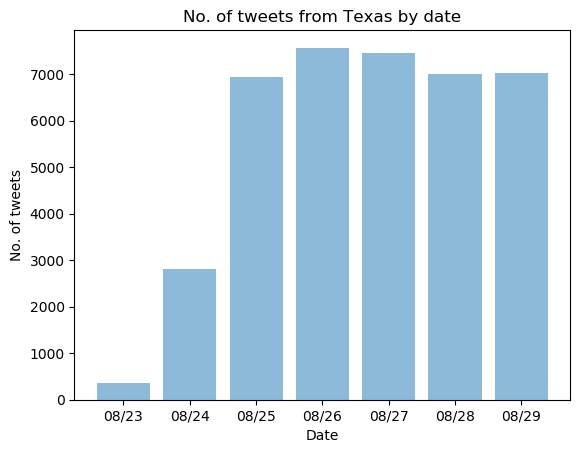

In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ("08/23", "08/24", "08/25", "08/26", "08/27", "08/28", \
                  "08/29")
y_pos = np.arange(7)
performance = [354,2820,6946,7567,7464,6998,7025]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Date')
plt.ylabel('No. of tweets')
plt.title('No. of tweets from Texas by date')
 
plt.show()

Generating graphs for temporal analyis of tweets from Louisiana .

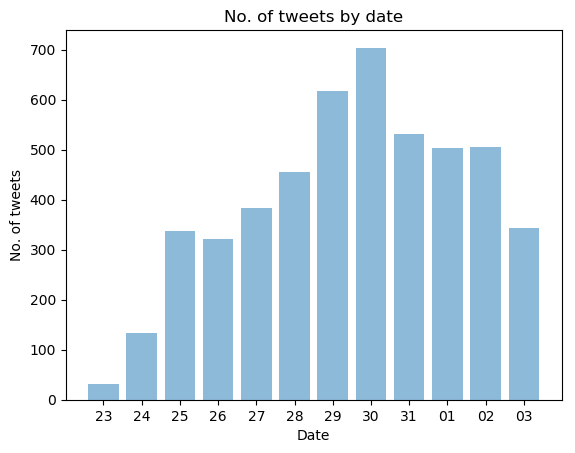

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ("23", "24", "25", "26", "27", "28", \
                  "29", "30", "31", "01", "02", "03" )
y_pos = np.arange(12)
performance = [31,134,337,321,384,456,618,704,532,503,506,343]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Date')
plt.ylabel('No. of tweets')
plt.title('No. of tweets by date')
 
plt.show()

Evacuation analysis for Houston

Generating pre-evacuation dataset for "Houston" from 08/23/2017 to 25/08/2017 using keyword 'harvey' 

In [ ]:

for subdir, dirs, files in os.walk(".//Harvey_Pre_USA"):
    for file in files:
        tweets = []
        filepath = subdir + os.sep + file
        for tweet in json.load(open(filepath, 'r')):
            try:
                if "Houston" in tweet["place"]["full_name"].encode('utf-8') and \
                "TX" in tweet["place"]["full_name"].encode('utf-8'):
                    tweets.append(tweet)
            except:
                continue
        f = open(".//Harvey_Pre_Evacuation_Houston//" +file, 'w+')
        json.dump(tweets, f)

Generating unique users from pre-evacuation dataset for Houston.

In [34]:
users_set_pre_evacuation_houston = set()
for subdir, dirs, files in os.walk(".//Harvey_Pre_Evacuation_Houston"):
    for file in files:
        filepath = subdir + os.sep + file
        try:
            for tweet in json.load(open(filepath, 'r')):
                users_set_pre_evacuation_houston.add(tweet["user"]["id"])
        except:
            continue 
print "Number of unique users from pre-evacuation dataset:", len(users_set_pre_evacuation_houston)

Number of unique users from pre-evacuation dataset: 1845


Generating intersection of common users from pre-evacuation dataset for Houston and post-evacuation dataset.

In [37]:
common_users_houston = []
common_users_houston = users_set_pre_evacuation_houston.intersection(users_set_post_evacuation)
number_common_users_houston = len(common_users_houston)
print "Number of common users from pre-evacuation and post-evacuation dataset: ",number_common_users_houston

Number of common users from pre-evacuation and post-evacuation dataset:  1243


**Generating tweets of common_users_houston from pre-evacuation period.**

In [ ]:
common_user_pre_tweets_houston = {}

for userid in common_users_houston:
    common_user_pre_tweets_houston[userid] = []
    
for subdir, dirs, files in os.walk(".//Harvey_Pre_Evacuation_Houston"):
    for file in files:
        filepath = subdir + os.sep + file
        for tweet in json.load(open(filepath, 'r')):
           
            if (tweet["user"]["id"] in common_users_houston):
                common_user_pre_tweets_houston[tweet["user"]["id"]].append(tweet)
        
f = open(".//common_user_pre_tweets_houston.json", 'w+')
json.dump(common_user_pre_tweets_houston, f) 

**Generating tweets of common_users_houston from post-evacuation period.**

In [ ]:
common_user_post_tweets_houston = {}

for userid in common_users_houston:
    common_user_post_tweets_houston[userid] = []
    
for subdir, dirs, files in os.walk(".//Harvey_Post_USA"):
    for file in files:
        filepath = subdir + os.sep + file
        for tweet in json.load(open(filepath, 'r')):    
            if (tweet["user"]["id"] in common_users_houston):
                common_user_post_tweets_houston[tweet["user"]["id"]].append(tweet)

f = open(".//common_user_post_tweets_houston.json", 'w+')
json.dump(common_user_post_tweets_houston, f) 

Generating evacuated users for Houston.

In [39]:
common_users_pre_houston_json = json.load(open("common_user_pre_tweets_houston.json", 'r'))
common_users_post_houston_json = json.load(open("common_user_post_tweets_houston.json", 'r'))
evacuated_houston = {}
#common_users_houston =  set(open('.//common_users_houston.txt').read().split())

for user in common_users_houston:
    pre_loc=set()
    post_loc=set()
    for tweet in common_users_pre_houston_json[str(user)]:
        pre_loc.add(tweet["place"]["full_name"])
    for tweet in common_users_post_houston_json[str(user)]:
        post_loc.add(tweet["place"]["full_name"])
    if "Texas, USA" in post_loc:
        post_loc.remove("Texas, USA")
    if (not pre_loc == post_loc and not len(post_loc)==0):
        evacuated_houston[str(user)] = [pre_loc, post_loc]
        
number_evacuated_houston = len(evacuated_houston)
print "Number of users that may have evacuated: ", number_evacuated_houston

Number of users that may have evacuated:  274


Computing evacuation rate for Houston

In [40]:
print "Estimated evacuation rate for Houston: ", number_evacuated_houston, "/", number_common_users_houston, "= %0.2f" \
% (number_evacuated_houston/(number_common_users_houston * 1.0) * 100) + "%"

Estimated evacuation rate for Houston:  274 / 1243 = 22.04%


Evacuation analysis for coastal cities

Generating pre-evacuation dataset for coastal cities from 08/23/2017 to 08/25/2017 using keyword 'harvey' 

In [4]:

coastal_cities =  set(open('.//coastal_cities.txt').read().split())

for subdir, dirs, files in os.walk(".//Harvey_Pre_USA"):
    for file in files:
        tweets = []
        filepath = subdir + os.sep + file
        for tweet in json.load(open(filepath, 'r')):
            try:
                for city in coastal_cities:
                    if city in tweet["place"]["full_name"].encode('utf-8') and \
                    "TX" in tweet["place"]["full_name"].encode('utf-8'):
                        tweets.append(tweet)
            except:
                continue
        f = open(".//Harvey_Pre_Evacuation_Coastal//" +file, 'w+')
        json.dump(tweets, f)

Generating unique users from pre-evacuation dataset for coastal cities.

In [3]:
users_set_pre_evacuation_coastal = set()
for subdir, dirs, files in os.walk(".//Harvey_Pre_Evacuation_Coastal"):
    for file in files:
        filepath = subdir + os.sep + file
        try:
            for tweet in json.load(open(filepath, 'r')):
                users_set_pre_evacuation_coastal.add(tweet["user"]["id"])
        except:
            continue 
print "Number of unique users from pre-evacuation dataset for coastal cities:", len(users_set_pre_evacuation_coastal)

Number of unique users from pre-evacuation dataset for coastal cities: 4836


Generating intersection of common users from pre-evacuation dataset for coastal cities and post-evacuation dataset.

In [5]:
common_users_coastal = []
common_users_coastal = users_set_pre_evacuation_coastal.intersection(users_set_post_evacuation)
number_common_users_coastal = len(common_users_coastal)
print "Number of common users from pre-evacuation and post-evacuation dataset: ",number_common_users_coastal

Number of common users from pre-evacuation and post-evacuation dataset:  2851


**Generating tweets of common_users_coastal from pre-evacuation period.**

In [ ]:
common_user_pre_tweets_coastal = {}

for userid in common_users_coastal:
    common_user_pre_tweets_coastal[userid] = []
    
for subdir, dirs, files in os.walk(".//Harvey_Pre_Evacuation_Coastal"):
    for file in files:
        filepath = subdir + os.sep + file
        for tweet in json.load(open(filepath, 'r')):
           
            if (tweet["user"]["id"] in common_users_coastal):
                common_user_pre_tweets_coastal[tweet["user"]["id"]].append(tweet)
        
f = open(".//common_user_pre_tweets_coastal.json", 'w+')
json.dump(common_user_pre_tweets_coastal, f) 

**Generating tweets of common_users_coastal from post-evacuation period.**

In [ ]:
common_user_post_tweets_coastal = {}

for userid in common_users_coastal:
    common_user_post_tweets_coastal[userid] = []
    
for subdir, dirs, files in os.walk(".//Harvey_Post_USA"):
    for file in files:
        filepath = subdir + os.sep + file
        for tweet in json.load(open(filepath, 'r')):    
            if (tweet["user"]["id"] in common_users_coastal):
                common_user_post_tweets_coastal[tweet["user"]["id"]].append(tweet)

f = open(".//common_user_post_tweets_coastal.json", 'w+')
json.dump(common_user_post_tweets_coastal, f) 

Generating evacuated users for coastal cities.

In [8]:
common_users_pre_coastal_json = json.load(open("common_user_pre_tweets_coastal.json", 'r'))
common_users_post_coastal_json = json.load(open("common_user_post_tweets_coastal.json", 'r'))
evacuated_coastal = {}

for user in common_users_coastal:
    pre_loc=set()
    post_loc=set()
    for tweet in common_users_pre_coastal_json[str(user)]:
        pre_loc.add(tweet["place"]["full_name"])
    for tweet in common_users_post_coastal_json[str(user)]:
        post_loc.add(tweet["place"]["full_name"])
    if "Texas, USA" in post_loc:
        post_loc.remove("Texas, USA")
    if (not pre_loc == post_loc and not len(post_loc)==0):
        evacuated_coastal[str(user)] = [pre_loc, post_loc]
        
number_evacuated_coastal = len(evacuated_coastal)
print "Number of users that may have evacuated in coastal cities: ", number_evacuated_coastal

Number of users that may have evacuated in coastal cities:  810


Computing evacuation rate for coastal cities

In [9]:
print "Estimated evacuation rate for coastal cities: ", number_evacuated_coastal, "/", number_common_users_coastal, "= %0.2f" \
% (number_evacuated_coastal/(number_common_users_coastal * 1.0) * 100) + "%"

Estimated evacuation rate for coastal cities:  810 / 2851 = 28.41%


In [46]:
max_rt_count = float("-inf")
max_tweet = None

for subdir, dirs, files in os.walk(".//Harvey_TX_by_date"):
    for file in files:
        if ("20170827" in file):
            filepath = subdir + os.sep + file
            for tweet in json.load(open(filepath, 'r')):
                try:
                    if tweet['quoted_status']['retweet_count'] > max_rt_count:
                        max_rt_count = tweet['quoted_status']['retweet_count']
                        max_tweet = tweet
                        print "hi"
                except:
                    print "hi"
                if tweet['retweet_count'] > max_rt_count:
                        max_rt_count = tweet['retweet_count']
                        max_tweet = tweet
                
print max_rt_count
print max_tweet

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
h